In [1]:
from sklearn.linear_model import LogisticRegression
#
# seed is 0
#

import numpy as np
import csv
X = np.ones((10000,3))
Y = []
i = 0
with open('Default.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(reader)
    for row in reader:
        X[i][0] = 1 if row[1] == '"Yes"' else 0
        X[i][1] = float(row[2])
        X[i][2] = float(row[3])/1000
        
        Y.append(1 if row[0] == '"Yes"' else 0)
        i+=1
      
    
print("Total Actual Positives:", Y.count(1))
print("Total Actual Negatives:", Y.count(0))
X = np.asarray(X)
Y = np.asarray(Y)

# X = X . reshape( -1 , 1 )
print( X . shape )
print( Y . shape )
clf = LogisticRegression( random_state = 0 ) . fit( X , Y )
print( clf . score( X , Y ) ) # mean accuracy

print( clf . intercept_ , clf . coef_ )

Total Actual Positives: 333
Total Actual Negatives: 9667
(10000, 3)
(10000,)
0.9732
[-10.90180458] [[-0.61256991  0.00573061  0.00396162]]


In [26]:
print(clf.predict_proba(X))
pobs = clf.predict_proba(X)
falsePos = 0
falseNeg = 0
threshold = 0.8
for i in range(len(X)):
    if pobs[i,0] <= threshold:
        if Y[i] == 0:
            falsePos+=1
    elif pobs[i,0] > threshold:
        if Y[i] == 1:
            falseNeg+=1
print("False Positives:", falsePos)
print("False Negatives:", falseNeg)

[[9.98565395e-01 1.43460492e-03]
 [9.98868946e-01 1.13105389e-03]
 [9.90280610e-01 9.71938990e-03]
 ...
 [9.97055260e-01 2.94474039e-03]
 [8.53854632e-01 1.46145368e-01]
 [9.99966239e-01 3.37612335e-05]]
False Positives: 277
False Negatives: 130


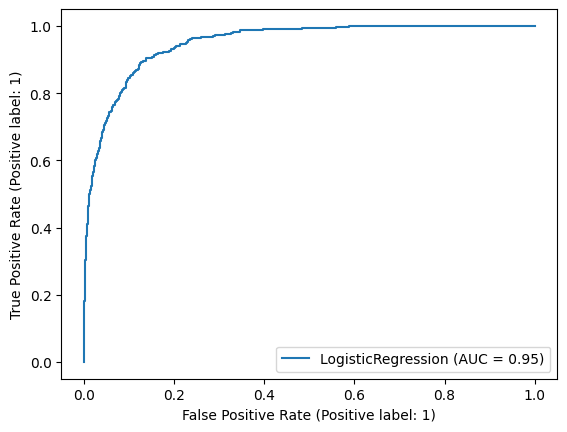

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X, Y)


In [7]:
from sklearn.linear_model import LogisticRegression
#
# seed is 0
#

import numpy as np
import csv
X = []
Y = []
with open('Default.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(reader)
    for row in reader:
        X.append(1 if row[1] == '"Yes"' else 0)
        Y.append(1 if row[0] == '"Yes"' else 0)
        
X = np.asarray(X)
Y = np.asarray(Y)
X = X . reshape( -1 , 1 )
print( X . shape )
print( Y . shape )
clf = LogisticRegression( random_state = 0 ) . fit( X , Y )
print( clf . score( X , Y ) ) # mean accuracy
print( clf . intercept_ , clf . coef_ )


(10000, 1)
(10000,)
0.9667
[-3.50213253] [[0.39960123]]


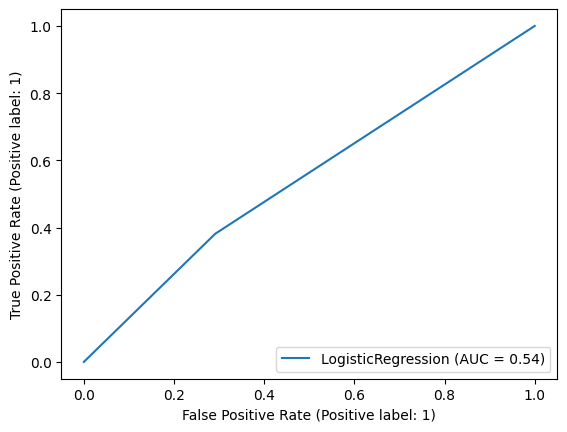

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X, Y)